# Introduction to Bike Sharing Demand Project

## Overview
In recent years, bike-sharing systems have gained popularity as an eco-friendly and cost-effective mode of transportation in urban areas. These systems allow users to rent bicycles for short periods, offering a convenient alternative to traditional transportation. As cities strive to promote sustainable mobility, understanding and predicting bike-sharing demand becomes crucial for optimizing operations, enhancing user experience, and planning for future infrastructure needs.

Project Objective
The primary objective of this project is to develop a machine learning model that accurately predicts the demand for bike sharing. By leveraging historical usage data, weather conditions, and temporal features, we aim to build a predictive model that can forecast the number of bikes rented at different times and locations. This information can help bike-sharing companies and city planners to:

Optimize Resource Allocation: Ensure that bikes are available where and when they are needed, reducing wait times and improving customer satisfaction.
Enhance Operational Efficiency: Balance the distribution of bikes across docking stations to minimize operational costs related to bike redistribution.
Support Strategic Planning: Inform decisions regarding the expansion of bike-sharing stations and the integration of bike-sharing with other public transport systems.

## Data Understanding an Exploration

### Data Preprocessing:

1. Handle missing values and outliers.
2. Convert categorical variables to numerical formats.
3. Normalize or standardize features if necessary.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [4]:
# Reading the dataset
dataset = pd.read_csv("london_merged.csv")

In [5]:
dataset.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


explanation of the parameters in the `london_merged.csv` dataset:

### Dataset Parameters

1. **timestamp**: This column represents the date and time of each record in the dataset. The format is `YYYY-MM-DD HH:MM:SS`. This timestamp indicates the specific hour for which the data is recorded.

2. **cnt**: This is the target variable representing the count of total bike rentals in a given hour. It is an integer value indicating the number of bikes rented during that hour.

3. **t1 (real temperature in C)**: This column represents the real temperature in degrees Celsius. It is a float value indicating the actual temperature recorded during that hour.

4. **t2 (feels like temperature in C)**: This column represents the "feels like" temperature in degrees Celsius. It is a float value indicating the temperature that users perceive, which can be different from the actual temperature due to factors like wind chill or humidity.

5. **hum (humidity in percentage)**: This column represents the humidity level as a percentage. It is a float value indicating the amount of moisture in the air.

6. **wind_speed (wind speed in km/h)**: This column represents the wind speed in kilometers per hour. It is a float value indicating how fast the wind is blowing.

7. **weather_code**: This column represents the weather condition code, which is a categorical value indicating different weather conditions. The codes might correspond to various weather types such as clear, cloudy, light rain, heavy rain, snow, etc. Here are possible weather codes based on typical datasets (you should verify these against the dataset documentation if available):
   - 1: Clear
   - 2: Scattered clouds
   - 3: Broken clouds
   - 4: Cloudy
   - 7: Rain
   - 10: Rain with thunderstorm
   - 26: Snowfall

8. **is_holiday**: This column is a binary variable indicating whether the given hour falls on a public holiday. A value of `1.0` means it is a holiday, and `0.0` means it is not.

9. **is_weekend**: This column is a binary variable indicating whether the given hour falls on a weekend. A value of `1.0` means it is a weekend (Saturday or Sunday), and `0.0` means it is a weekday.

10. **season**: This column represents the season in which the given hour falls. It is a categorical value typically encoded as:
    - 1.0: Winter
    - 2.0: Spring
    - 3.0: Summer
    - 4.0: Autumn

### Example Data Points

- **timestamp**: `2015-01-04 00:00:00`
- **cnt**: `182`
- **t1**: `3.0`
- **t2**: `2.0`
- **hum**: `93.0`
- **wind_speed**: `6.0`
- **weather_code**: `3.0` (Broken clouds)
- **is_holiday**: `0.0` (Not a holiday)
- **is_weekend**: `1.0` (It is a weekend)
- **season**: `3.0` (Summer)

This data point represents 182 bike rentals at midnight on January 4, 2015, with a real temperature of 3.0°C, a "feels like" temperature of 2.0°C, 93% humidity, and a wind speed of 6 km/h. The weather was categorized as "broken clouds," and it was a weekend but not a holiday during the summer season.

By analyzing and modeling these parameters, we can predict the bike rental demand based on various factors such as time, weather, and special occasions.

In [7]:
dataset.shape

(17414, 10)

In [9]:
dataset.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [10]:
dataset.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [17]:
#assign string values to season
dataset.loc[(dataset['season']== 1.0), 'season'] = 'Winter'
dataset.loc[(dataset['season']== 2.0), 'season'] = 'spring'
dataset.loc[(dataset['season']== 3.0), 'season'] = 'Summer'
dataset.loc[(dataset['season']== 4.0), 'season'] = 'Autumn'

In [19]:
dataset['season'].astype('category').value_counts()

season
0.0       4394
Winter    4387
Summer    4330
spring    4303
Name: count, dtype: int64

In [21]:
dataset['cnt'].astype('category').value_counts()

cnt
46      46
53      39
120     36
33      36
70      36
        ..
3147     1
3146     1
3140     1
3139     1
7860     1
Name: count, Length: 3781, dtype: int64

In [22]:
dataset['is_holiday'].astype('category').value_counts()

is_holiday
0.0    17030
1.0      384
Name: count, dtype: int64

# # 2.Data Visualization

1. Loading and Preprocessing:

The dataset is loaded using Pandas.
The timestamp column is converted to a datetime object.
Additional temporal features such as hour, day, month, year, and day of the week are extracted for further analysis.

2. Data Visualization:

1] Distribution of Bike Rentals: A histogram with a KDE (Kernel Density Estimate) is plotted to show the distribution of bike rentals.
2] Time Series Analysis: A line plot is created to visualize bike rentals over time.
3] Bike Rentals by Hour: A box plot shows the distribution of bike rentals for each hour of the day.
4] Bike Rentals by Day of the Week: A box plot shows the distribution of bike rentals for each day of the week.
5] Bike Rentals by Month: A box plot shows the distribution of bike rentals for each month.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [30]:
# Extract additional temporal features
dataset['hour'] = dataset['timestamp'].dt.hour
dataset['day'] = dataset['timestamp'].dt.day
dataset['month'] = dataset['timestamp'].dt.month
dataset['year'] = dataset['timestamp'].dt.year
dataset['dayofweek'] = dataset['timestamp'].dt.dayofweek

In [31]:
# Set the style for seaborn
sns.set(style="whitegrid")

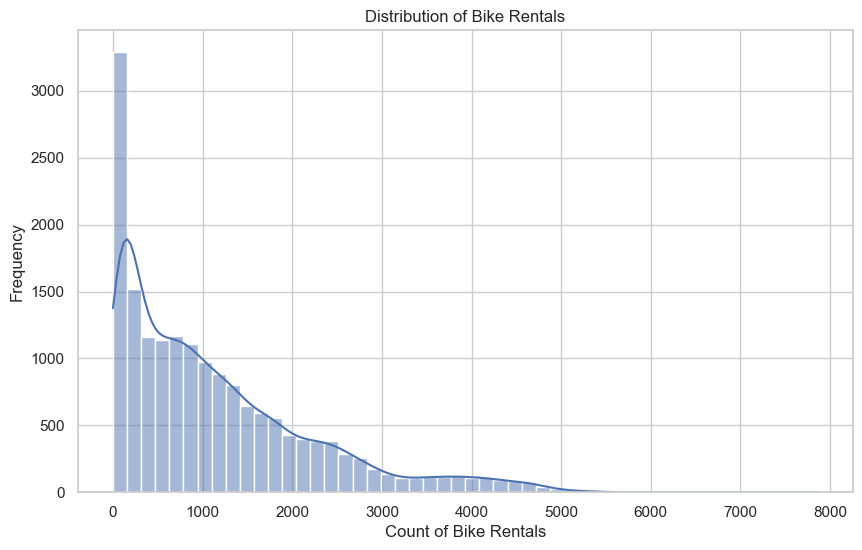

In [32]:
# Plotting the distribution of bike rentals
plt.figure(figsize=(10, 6))
sns.histplot(dataset['cnt'], bins=50, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

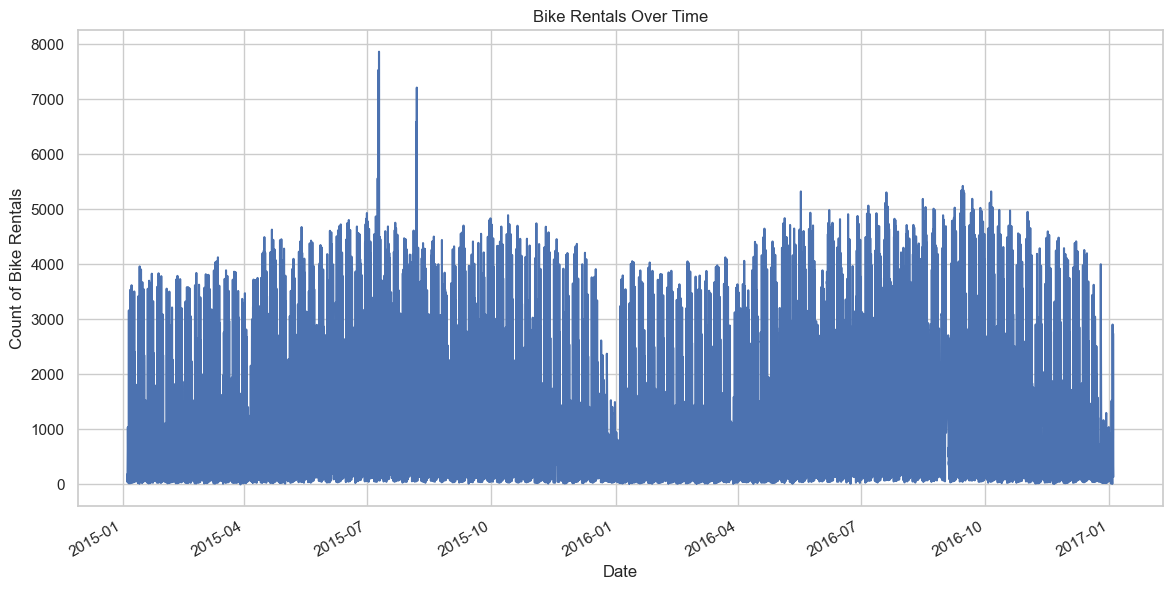

In [34]:
# Time series analysis
plt.figure(figsize=(14, 7))
dataset.set_index('timestamp')['cnt'].plot()
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Bike Rentals')
plt.show()

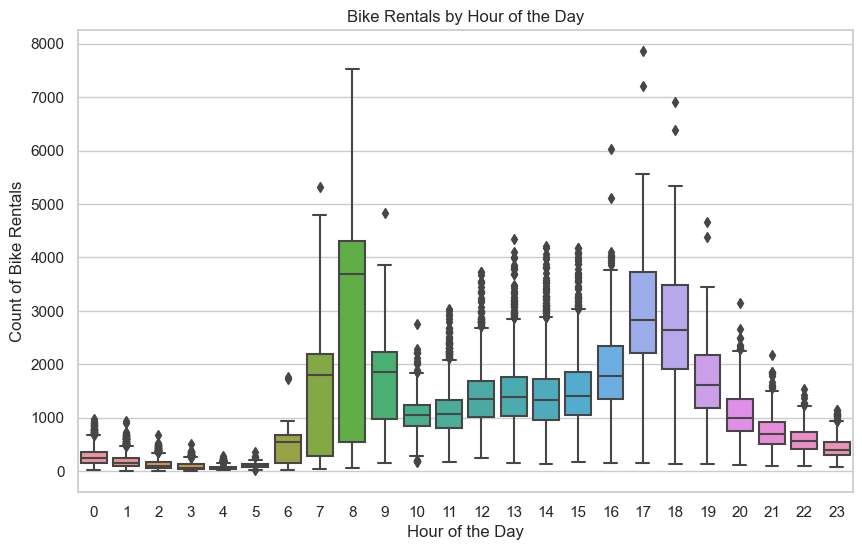

In [35]:
# Average bike rentals by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='cnt', data=dataset)
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Bike Rentals')
plt.show()

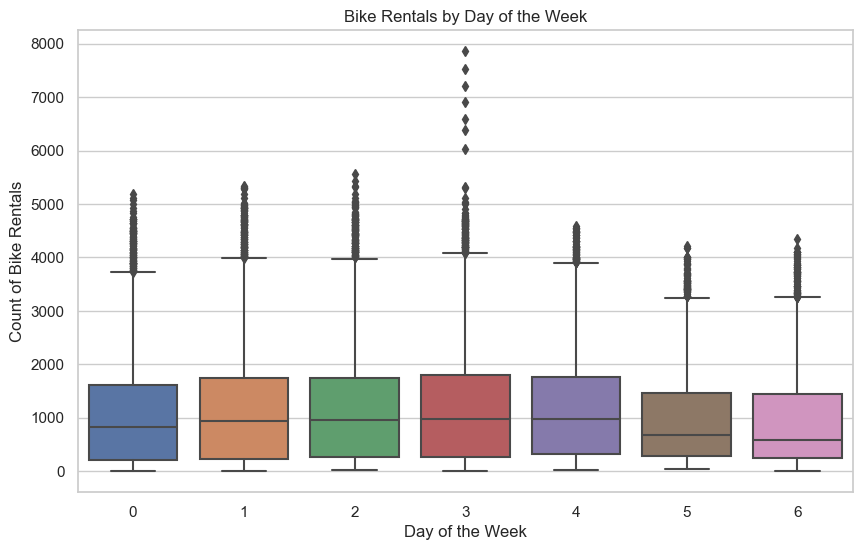

In [36]:
# Average bike rentals by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='cnt', data=dataset)
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Bike Rentals')
plt.show()

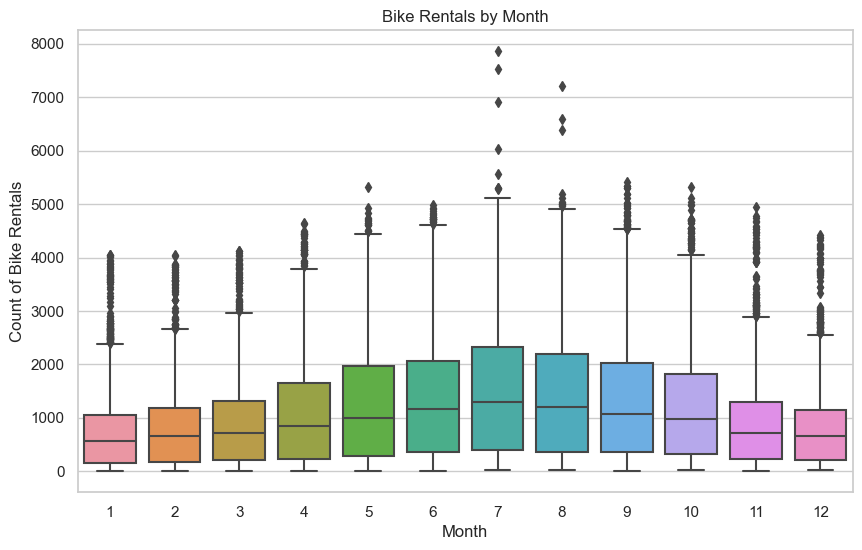

In [37]:
# Average bike rentals by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='cnt', data=dataset)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')
plt.show()

In [41]:
# Manually map seasons to numeric values if they are not already numeric
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
if dataset['season'].dtype == object:
    dataset['season'] = dataset['season'].map(season_mapping)

##### Correlation Matrix:
A heatmap displays the correlations between the different features.
Bike Rentals vs Temperature/Humidity/Wind Speed: Scatter plots show the relationship between bike rentals and these weather-related features, with colors indicating different seasons.
Bike Rentals by Weather Condition: A box plot shows the distribution of bike rentals for different weather conditions.

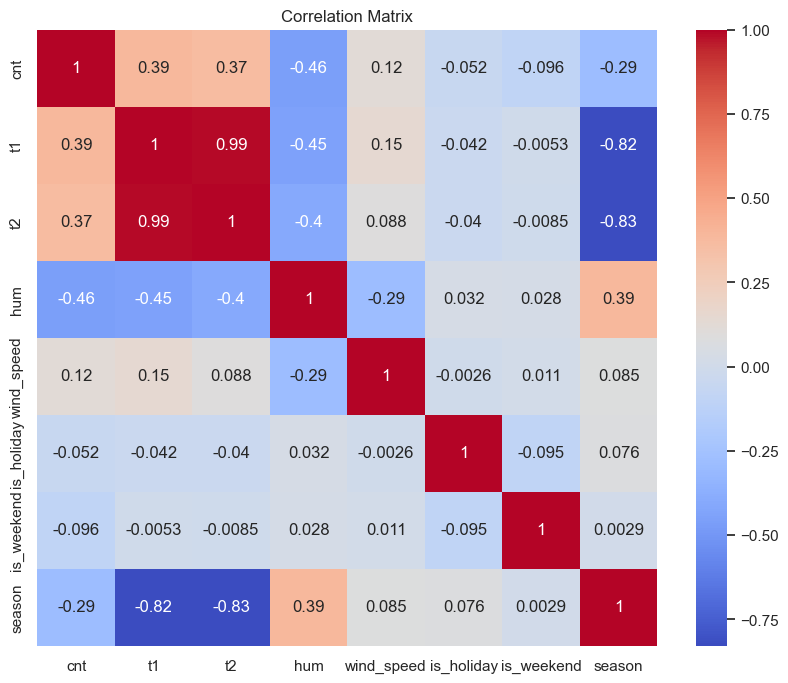

In [42]:
#Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[['cnt', 't1', 't2', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'season']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

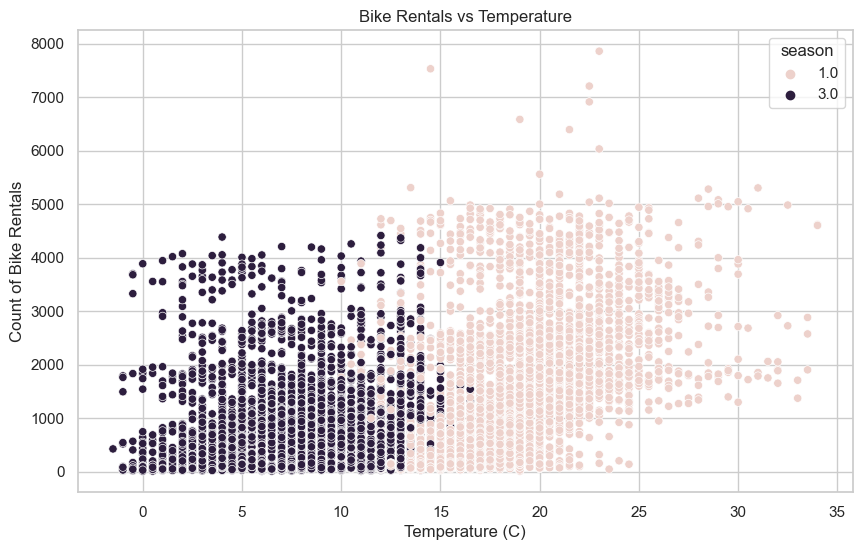

In [44]:
# Relationship between bike rentals and temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t1', y='cnt', data=dataset, hue='season')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Count of Bike Rentals')
plt.show()

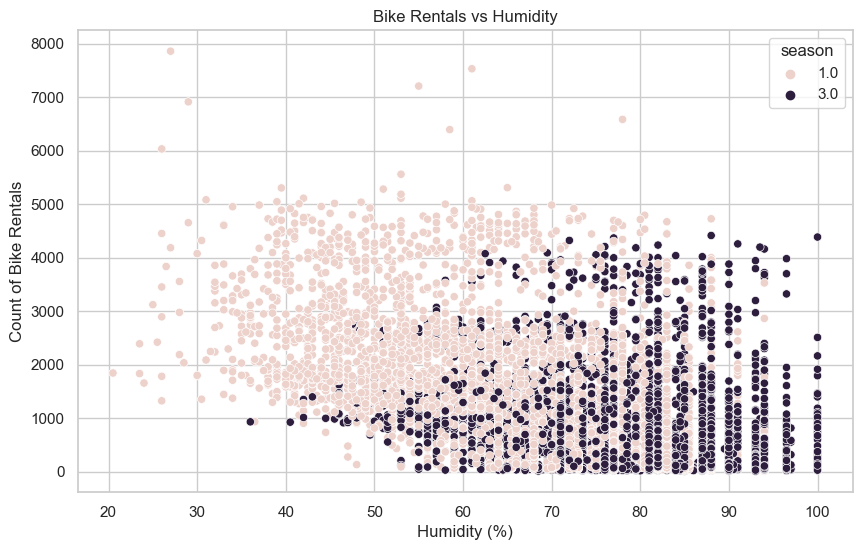

In [45]:
# Relationship between bike rentals and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=dataset, hue='season')
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Count of Bike Rentals')
plt.show()

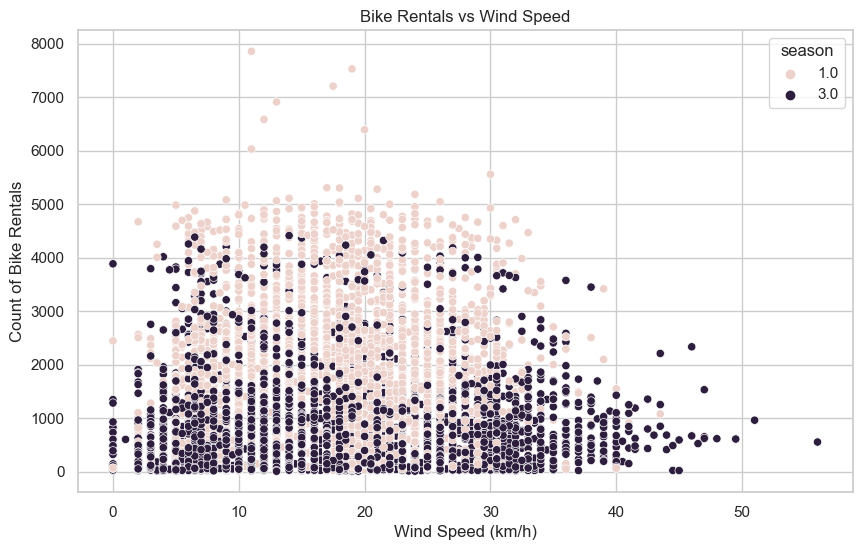

In [46]:
# Relationship between bike rentals and wind speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='cnt', data=dataset, hue='season')
plt.title('Bike Rentals vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Count of Bike Rentals')
plt.show()

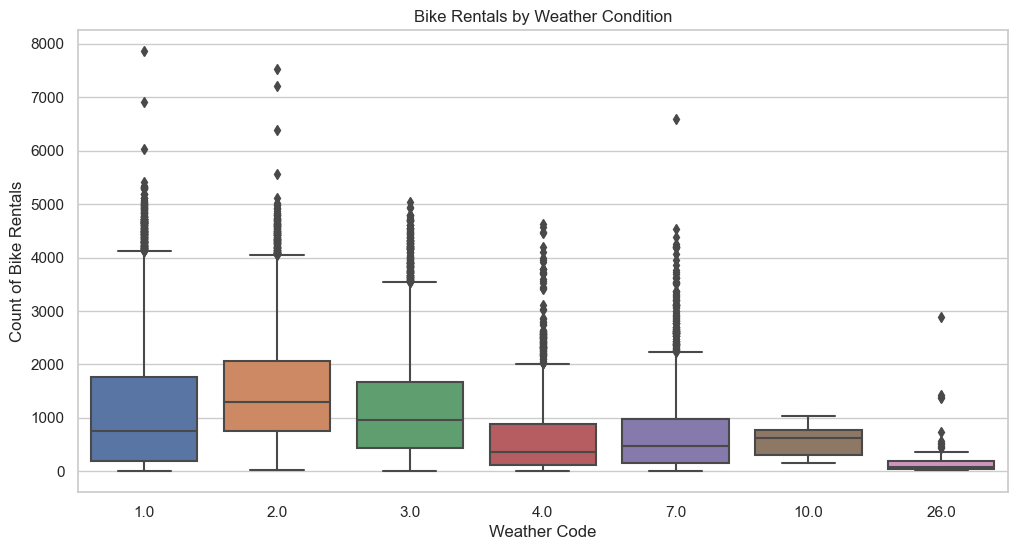

In [48]:
# Average bike rentals by weather condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_code', y='cnt', data=dataset)
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Code')
plt.ylabel('Count of Bike Rentals')
plt.show()

## 3. Data Preparation

In [49]:
# Drop the original timestamp column as it's no longer needed
dataset.drop('timestamp', axis=1, inplace=True)

In [50]:
# Check for missing values and fill or drop as appropriate
print("Missing values in the dataset:")
print(dataset.isnull().sum())


Missing values in the dataset:
cnt                0
t1                 0
t2                 0
hum                0
wind_speed         0
weather_code       0
is_holiday         0
is_weekend         0
season          8697
hour               0
day                0
month              0
year               0
dayofweek          0
dtype: int64


In [51]:
# Define the feature columns and target column
feature_columns = ['t1', 't2', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'season', 'hour', 'day', 'month', 'year', 'dayofweek', 'weather_code']
target_column = 'cnt'

In [55]:
#importing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [56]:
# Separate features and target
X = dataset[feature_columns]
y = dataset[target_column]

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
# We need to scale numerical features and one-hot encode categorical features

In [58]:
# Identify numeric and categorical columns
numeric_features = ['t1', 't2', 'hum', 'wind_speed', 'hour', 'day', 'month', 'year', 'dayofweek']
categorical_features = ['is_holiday', 'is_weekend', 'season', 'weather_code']

In [59]:
# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with model training (using a dummy model for now)
model = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the model on the training data
model.fit(X_train, y_train)

# Transform the training and testing data
X_train_prepared = model.transform(X_train)
X_test_prepared = model.transform(X_test)

# Output the prepared data shapes
print("Prepared training data shape:", X_train_prepared.shape)
print("Prepared testing data shape:", X_test_prepared.shape)



Prepared training data shape: (13931, 23)
Prepared testing data shape: (3483, 23)


In [60]:
#Optionally, you can save the prepared data for later use
pd.DataFrame(X_train_prepared).to_csv('X_train_prepared.csv', index=False)
pd.DataFrame(X_test_prepared).to_csv('X_test_prepared.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

# 4.Model Training

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"Testing MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"Training MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
    print(f"Testing MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
    print(f"Training R²: {r2_score(y_train, y_pred_train):.2f}")
    print(f"Testing R²: {r2_score(y_test, y_pred_test):.2f}")
    print("\n")

# Models to evaluate
models = [
    Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))])
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: Pipeline
Training MAE: 648.61
Testing MAE: 657.85
Training MSE: 788176.33
Testing MSE: 825415.52
Training R²: 0.33
Testing R²: 0.31


Model: Pipeline
Training MAE: 43.23
Testing MAE: 114.31
Training MSE: 6033.62
Testing MSE: 45141.31
Training R²: 0.99
Testing R²: 0.96


Model: Pipeline
Training MAE: 229.29
Testing MAE: 232.90
Training MSE: 127624.34
Testing MSE: 133513.05
Training R²: 0.89
Testing R²: 0.89




### The performance metrics reported for each model include:

1. Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values. Lower values indicate better model performance.
2. Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values. Lower values indicate better model performance.
3. R² Score (R²): The proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better model performance, with 1 being the best possible score.

# visualize feature importance using the Random Forest Regressor:

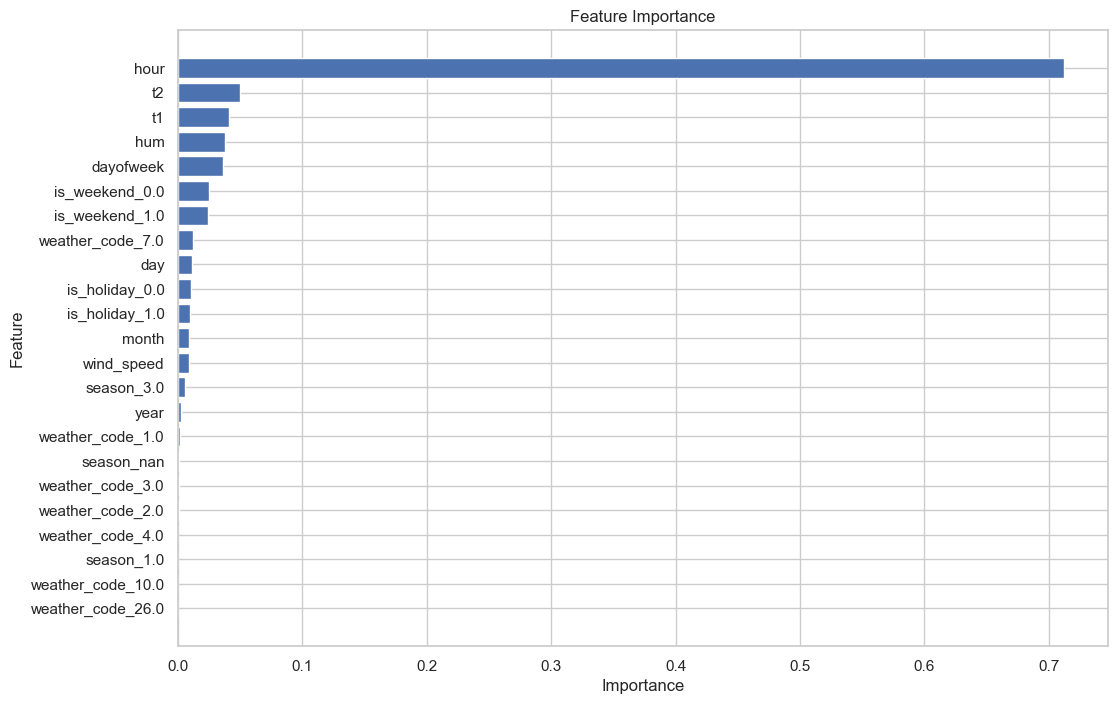

In [64]:
# Define the Random Forest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

# Fit the model
model.fit(X_train, y_train)

# Extract the RandomForestRegressor from the pipeline
rf_model = model.named_steps['regressor']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names after one-hot encoding
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## Summary and Recommendations

##### Linear Regression: 
The model's performance is subpar compared to the other models. It explains only a small portion of the variance and has higher errors, indicating it is not suitable for this dataset.
##### Random Forest Regressor: 
This model performs the best with the lowest errors and the highest R² scores, suggesting it captures the underlying patterns in the data very well. However, slight overfitting might be a concern.
##### Gradient Boosting Regressor: 
This model performs well with high R² scores and reasonably low errors, indicating it is a robust model that generalizes well without overfitting.
Given the evaluation metrics, the Random Forest Regressor is recommended for its superior performance on this dataset, despite the slight overfitting. It can be further fine-tuned to improve generalization. The Gradient Boosting Regressor is also a strong candidate, offering a balance between accuracy and generalization.